In [1]:
%%bash

pip install svgling git+https://github.com/IINemo/isanlp.git ufal.udpipe natasha
wget -q https://lindat.mff.cuni.cz/repository/xmlui/bitstream/handle/11234/1-3131/russian-syntagrus-ud-2.5-191206.udpipe

  Cloning https://github.com/IINemo/isanlp.git to /tmp/pip-req-build-84r5uaqb


  Running command git clone --filter=blob:none --quiet https://github.com/IINemo/isanlp.git /tmp/pip-req-build-84r5uaqb


  Resolved https://github.com/IINemo/isanlp.git to commit 1e5166c23b1658d58e35164fcbc0e29d2f07464a
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 379.1 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import nltk
import svgling

## Синтаксический анализ

([Задание для семинара](#scrollTo=Hj1oveMEFv1m&line=5&uniqifier=1), 
[Домашнее задание](#scrollTo=QwS83LQ_2Erz&line=1&uniqifier=1))


#### Грамматика составляющих


Обозначения:

| symbol | meaning              | example          |
| ---    | ---                  | ---              |
| NP     | noun phrase	        | a dog            |
| VP     | verb phrase	        | saw a park       |
| PP     | prepositional phrase | with a telescope |
| Det    | determiner           | the              |
| N      | noun                 | dog              |
| V      | verb	                | walked           |
| P	     | preposition          | in               |

::: Recursive descent parsing:::
Parsing 'Mary saw a dog'
    [ * S ]
  E [ * NP VP ]
  E [ * 'John' VP ]
  E [ * 'Mary' VP ]
  M [ 'Mary' * VP ]
  E [ 'Mary' * V NP ]
  E [ 'Mary' * 'saw' NP ]
  M [ 'Mary' 'saw' * NP ]
  E [ 'Mary' 'saw' * 'John' ]
  E [ 'Mary' 'saw' * 'Mary' ]
  E [ 'Mary' 'saw' * 'Bob' ]
  E [ 'Mary' 'saw' * Det N ]
  E [ 'Mary' 'saw' * 'a' N ]
  M [ 'Mary' 'saw' 'a' * N ]
  E [ 'Mary' 'saw' 'a' * 'man' ]
  E [ 'Mary' 'saw' 'a' * 'dog' ]
  M [ 'Mary' 'saw' 'a' 'dog' ]
  + [ 'Mary' 'saw' 'a' 'dog' ]
(S (NP Mary) (VP (V saw) (NP (Det a) (N dog))))

  E [ 'Mary' 'saw' 'a' * 'cat' ]
  E [ 'Mary' 'saw' 'a' * 'telescope' ]
  E [ 'Mary' 'saw' 'a' * 'park' ]
  E [ 'Mary' 'saw' * 'an' N ]
  E [ 'Mary' 'saw' * 'the' N ]
  E [ 'Mary' 'saw' * 'my' N ]
  E [ 'Mary' 'saw' * Det N PP ]
  E [ 'Mary' 'saw' * 'a' N PP ]
  M [ 'Mary' 'saw' 'a' * N PP ]
  E [ 'Mary' 'saw' 'a' * 'man' PP ]
  E [ 'Mary' 'saw' 'a' * 'dog' PP ]
  M [ 'Mary' 'saw' 'a' 'dog' * PP ]
  E [ 'Mary' 'saw' 'a' 'do

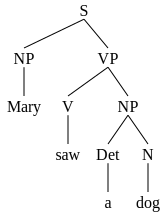

In [2]:
grammar = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park"
  P -> "in" | "on" | "by" | "with"
  """)

sent = "Mary saw a dog".split()
rd_parser = nltk.RecursiveDescentParser(grammar, trace=2)  # сверху вниз

print("::: Recursive descent parsing:::")
for tree in rd_parser.parse(sent):
    print(tree)
    print()

svgling.draw_tree(tree)

::: Shift reduce parsing :::
Parsing 'Mary saw a dog'
    [ * Mary saw a dog]
  S [ 'Mary' * saw a dog]
  R [ NP * saw a dog]
  S [ NP 'saw' * a dog]
  R [ NP V * a dog]
  S [ NP V 'a' * dog]
  R [ NP V Det * dog]
  S [ NP V Det 'dog' * ]
  R [ NP V Det N * ]
  R [ NP V NP * ]
  R [ NP VP * ]
  R [ S * ]
(S (NP Mary) (VP (V saw) (NP (Det a) (N dog))))


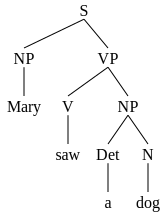

In [3]:
print("::: Shift reduce parsing :::")
rd_parser = nltk.ShiftReduceParser(grammar, trace=2)  # снизу вверх

for tree in rd_parser.parse(sent):
    print(tree)
    
svgling.draw_tree(tree)

Посмотреть на грамматику составляющих на русском языке: http://aot.ru/demo/synt.html

#### Грамматика зависимостей

(saw Mary (dog a))


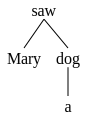

In [4]:
dep_grammar = nltk.DependencyGrammar.fromstring("""
 'saw' -> 'Mary' | 'dog'
 'dog' -> 'a'
""")

pdp = nltk.ProjectiveDependencyParser(dep_grammar)
trees = pdp.parse(sent)
for tree in trees:
     print(tree)
        
svgling.draw_tree(tree)

(shot I (elephant an (in (pajamas my))))
(shot I (elephant an) (in (pajamas my)))


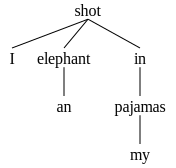

In [5]:
groucho_dep_grammar = nltk.DependencyGrammar.fromstring("""
 'shot' -> 'I' | 'elephant' | 'in'
 'elephant' -> 'an' | 'in'
 'in' -> 'pajamas'
 'pajamas' -> 'my'
""")

pdp = nltk.ProjectiveDependencyParser(groucho_dep_grammar)
sent = 'I shot an elephant in my pajamas'.split()
trees = pdp.parse(sent)
for tree in trees:
     print(tree)
        
svgling.draw_tree(tree)

### MaltParser
http://nlp.isa.ru/demo/ssa

In [6]:
! wget -q http://maltparser.org/dist/maltparser-1.8.1.zip && unzip maltparser-1.8.1.zip 

^C


In [ ]:
! wget -q http://www.maltparser.org/mco/english_parser/engmalt.poly-1.7.mco

(shot I (elephant an (in (pajamas my))))


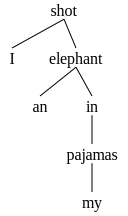

In [ ]:
from nltk.parse.malt import MaltParser

mp = MaltParser('maltparser-1.8.1', 'engmalt.poly-1.7.mco')
sent1 = 'I shot an elephant in my pajamas'.split()
tree = mp.parse_one(sent1).tree()
print(tree)
svgling.draw_tree(tree)

### UDPipe 

In [1]:
from isanlp.processor_udpipe import ProcessorUDPipe

udpipe = ProcessorUDPipe('russian-syntagrus-ud-2.5-191206.udpipe')

In [2]:
result = udpipe("""Чашка стоит на столе и дымится. 
В Минпросвещения рассказали о разработке российского аналога TikTok для школьников.""")
result.keys()

dict_keys(['form', 'lemma', 'postag', 'morph', 'syntax_dep_tree', 'sentences', 'tokens'])

In [3]:
print(vars(result['syntax_dep_tree'][0][4]))
print(result['morph'][0])

{'parent': 5, 'link_name': 'cc'}
[{'Animacy': 'Anim', 'Case': 'Nom', 'Gender': 'Masc', 'Number': 'Sing'}, {'Aspect': 'Imp', 'Mood': 'Ind', 'Number': 'Sing', 'Person': '3', 'Tense': 'Pres', 'VerbForm': 'Fin', 'Voice': 'Act'}, {}, {'Animacy': 'Inan', 'Case': 'Loc', 'Gender': 'Masc', 'Number': 'Sing'}, {}, {'Aspect': 'Imp', 'Mood': 'Ind', 'Number': 'Sing', 'Person': '3', 'Tense': 'Pres', 'VerbForm': 'Fin', 'Voice': 'Mid'}, {}]


In [4]:
for i, dependency_edge in enumerate(result['syntax_dep_tree'][0]):
    print(i, vars(dependency_edge)['parent'], vars(dependency_edge)['link_name'])

0 1 nsubj
1 -1 root
2 3 case
3 1 obl
4 5 cc
5 1 conj
6 1 punct


In [5]:
from natasha.doc import DocToken, syntax_markup


def isanlp2natasha(annotation):
    result = []
    sentence_counter = 0
    token_counter = 0
    
    for i, token in enumerate(annotation['tokens']):
            
        token_pos = annotation['postag'][sentence_counter][token_counter]
        token_feats = list(annotation['morph'][sentence_counter][token_counter].values())
        token_syntax = annotation['syntax_dep_tree'][sentence_counter][token_counter]
        
        result.append(
            DocToken(
                start=token.begin, 
                stop=token.end, 
                text=token.text, 
                id=f"{sentence_counter}_{token_counter}", 
                head_id=f"{sentence_counter}_{token_syntax.parent}", 
                rel=token_syntax.link_name, 
                pos=token_pos, 
                feats=token_feats
            )
        )
        
        token_counter += 1
        
        if token_counter == len(annotation['syntax_dep_tree'][sentence_counter]):
            token_counter = 0
            sentence_counter += 1
            
        if sentence_counter == len(annotation['syntax_dep_tree']):
            return result

In [6]:
syntax_markup(isanlp2natasha(result)).print()

          ┌► Чашка          nsubj
    ┌─┌─┌─└─ стоит          
    │ │ │ ┌► на             case
    │ │ └►└─ столе          obl
    │ │   ┌► и              cc
    │ └──►└─ дымится        conj
    └──────► .              punct
          ┌► В              case
        ┌►└─ Минпросвещения obl
┌─────┌─└─── рассказали     
│     │   ┌► о              case
│   ┌─└──►└─ разработке     obl
│   │     ┌► российского    amod
│ ┌─└──►┌─└─ аналога        nmod
│ │     └──► TikTok         nmod
│ │       ┌► для            case
│ └──────►└─ школьников     nmod
└──────────► .              punct


## Задание для семинара (2 балла)

На практике часто требуется сравнивать предложения. Если нужно сравнить значения двух предложений, узнать, говорят ли они о похожих фактах, можно использовать сравнение векторов этих предложений. Если нужно сравнить синтаксис, например, вы хотите понять, что пользователь вопросно-ответной системы задал вопрос в характерной для какого-то вида ответа форме, или хотите найти в текстовом корпусе все предложения-факты, синтаксически похожие на предложение "Пушкин родился в Москве", то можно сравнивать структуры деревьев зависимостей. Для этого, в частности, можно использовать такую метрику, как расстояние редактирования деревьев. 

Расстояние редактирования строк мы уже видели: это минимальное количество операций редактирования, необходимых для превращения одной строки в другую. Определение расстояния редактирования графов и деревьев аналогично. В набор операций редактирования входят удаление или вставка вершины, удаление или вставка ребра, изменение метки вершины, изменение метки ребра.  У вас есть три предложения, которые надо попарно сравнить.

In [7]:
examples = ["Привет, у нас на кухне нашли плесень!", 
            "На нашей кухне нашли много всего: бактерии, грибки и позавчерашнее молоко.",
            "Привет, у них в подвале нашли клад!" ]

Первое и третье не очень похожи лексически, и описывают они совсем непохожие факты, но если мы обезличим их деревья зависимостей, а, скажем, возьмем в качестве меток токенов только их части речи, то увидим, что синтаксически они одинаковы. 

In [14]:
! pip install zss


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [8]:
# ToDO: Поскольку мы будем вычислять расстояние между деревьями зависимостей, здесь нужно инициализировать морфосинтаксический анализатор
# Нам понадобятся не только синтаксис, но и части речи!
#
from isanlp.processor_udpipe import ProcessorUDPipe
processor = ProcessorUDPipe('russian-syntagrus-ud-2.5-191206.udpipe')

In [9]:
from zss import simple_distance, Node


def pos_dep_tree(postags, syntax_dep_tree):
    """ Конвертируем результат морфосинтаксического анализа в zss-дерево из частей речи и синтаксических связей
    NOUN -> advmod -> VERB """
    
    root = Node('root')
    pos_nodes = {-1: root}
    for i, postag in enumerate(postags):
        pos_nodes[i] = Node(postag)

    for i, dependency_edge in enumerate(syntax_dep_tree):
        # ToDO: Здесь в зависимости от выбранного формата синтаксических аннотаций заполняем граф значениями
        # <синтаксическое отношение, порядковый номер вершины (токена), порядковый номер его родительской вершины>
        #
        relation, index, parent_index = vars(dependency_edge)['link_name'], i, vars(dependency_edge)['parent']
        ###########################
        relation_node = Node(relation)
        pos_nodes[parent_index].addkid(relation_node)
        relation_node.addkid(pos_nodes[index])

    return root

def sent_dep_tree(sent):
    """ Получаем список постегов и список синтаксических аннотаций слов предложения, полученные выбранным анализатором (или анализаторами) """
    
    result = processor(sent)
    postags = result['postag'][0]
    syntax_dep_tree = result['syntax_dep_tree'][0]
    return pos_dep_tree(postags, syntax_dep_tree)

def dep_tree_similarity(dep1, dep2, smoothing=5.0):
    return smoothing / (smoothing + simple_distance(dep1, dep2))

def sentence_similarity(sent1, sent2, smoothing=5.0):
    return dep_tree_similarity(sent_dep_tree(sent1), sent_dep_tree(sent2), smoothing)

In [10]:
for pair in [[0, 1], [1, 2], [0, 2]]:
    print((examples[pair[0]], examples[pair[1]],
           sentence_similarity(examples[pair[0]], examples[pair[1]])))

('Привет, у нас на кухне нашли плесень!', 'На нашей кухне нашли много всего: бактерии, грибки и позавчерашнее молоко.', 0.1724137931034483)
('На нашей кухне нашли много всего: бактерии, грибки и позавчерашнее молоко.', 'Привет, у них в подвале нашли клад!', 0.1724137931034483)
('Привет, у нас на кухне нашли плесень!', 'Привет, у них в подвале нашли клад!', 1.0)


\* *Ради интереса и дополнительных баллов за активность можете попробовать векторизовать эти предложения [трансформером](https://huggingface.co/DeepPavlov/rubert-base-cased-sentence#rubert-base-cased-sentence) и посчитать косинусную близость. Но это не обязательно.*

## Домашнее задание (6 баллов)

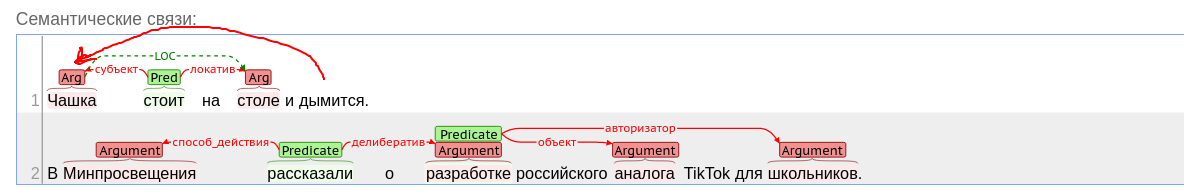




Обучите модель для извлечения семантических аргументов на основе русскоязычного корпуса Framebank. В качестве предикатов использовать глаголы, причастия, деепричастия. Возможный вид таблицы признаков (в первой колонке ``isRel`` - значения, которые нужно предсказать) для примера на картинке:

| isRel    | Predicate       | Argument        | PredNum  | ArgNum | PredPOS | ArgPOS | PredParent| PredParentRelation | ArgParent | ArgParentRelation | ArgChild_case
| ---    | ---             | ---             | ---      | ---    | ---     | ---    | ---		  | ---				   | ---       | ---               | ---
| True   | стоит           | Чашка           | 1		  | 0	   | VERB    | NOUN   | -1        |					   | 1         | nsubj             |
| True   | стоит		     | столе           | 1		  | 3      | VERB    | NOUN	  | -1		  |					   | 1         | obl			   | на
| True   | дымится	     | Чашка		   | 5		  | 0	   | VERB	 | NOUN   | 1		  | conj			   | 1		   | nsubj			   |
| False  | дымится		 | столе		   | 5		  | 3	   | VERB	 | NOUN   | 1		  | conj			   | 1		   | obl			   | на
| True   | рассказали      | Минпросвещения  | 2        | 1      | VERB    | PROPN  | -1        |					   | 2		   | obl			   | в
| True	 | рассказали		 | разработке	   | 2   	  | 4      | VERB    | NOUN   | -1		  |					   | 2		   | obl			   | о
| False	 | рассказали      | аналога         | 2        | 6	   | VERB    | NOUN   | -1        |					   | 4		   | nmod			   | 
| False  | рассказали      | TikTok		   | 2        | 7	   | VERB	 | PROPN  | -1 		  |					   | 6		   | nmod			   |
| False	 | рассказали		 | школьников	   | 2 		  | 9	   | VERB	 | NOUN   | -1 		  |					   | 6		   | nmod			   | для

* Проблему представляют сложноподчиненные предложения, однородные предикаты/аргументы, причастные и деепричастные обороты
* Некоторые тексты из корпуса не содержат размеченные роли. Эти тексты не обрабатывайте.
* Для примера дальнейший код запущен на первых тридцати записях корпуса. Вам нужно использовать все данные.

Будут приняты решения, присланные до 12:00 13 октября (без штрафа).

#### Загружаем корпус 

In [75]:
! wget https://www.dropbox.com/s/ewgvvsqqtbtrs4z/framebank_train.json

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/peter/.wget-hsts'. HSTS will be disabled.
--2022-12-24 18:13:55--  https://www.dropbox.com/s/ewgvvsqqtbtrs4z/framebank_train.json
Resolving www.dropbox.com (www.dropbox.com)... 162.125.70.18, 2620:100:6026:18::a27d:4612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.70.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ewgvvsqqtbtrs4z/framebank_train.json [following]
--2022-12-24 18:13:56--  https://www.dropbox.com/s/raw/ewgvvsqqtbtrs4z/framebank_train.json
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc28256fb646bc9a9fc167be8904.dl.dropboxusercontent.com/cd/0/inline/BzNBVw7uKordENbXcye36oyY-l_CG06Y3b1K5-4nCeQfAy29-VIsqDoQxii5TcSoaIkN11Au4R3PnbctRckeCFGywWlKzC3aNFtsY32WDABDPsspn8MXHeWm4_OXagv2TdNsQvvug167bNFidwFoziWwYYyHr_TJXj_Vr9wvp5UkXA/

In [76]:
! wget https://www.dropbox.com/s/g5c2npwingpyavi/framebank_test.json

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/peter/.wget-hsts'. HSTS will be disabled.
--2022-12-24 18:16:42--  https://www.dropbox.com/s/g5c2npwingpyavi/framebank_test.json
Resolving www.dropbox.com (www.dropbox.com)... 162.125.70.18, 2620:100:6026:18::a27d:4612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.70.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/g5c2npwingpyavi/framebank_test.json [following]
--2022-12-24 18:16:42--  https://www.dropbox.com/s/raw/g5c2npwingpyavi/framebank_test.json
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc158d11de1b1cddf2a28e21a0e5.dl.dropboxusercontent.com/cd/0/inline/BzMkrUfeA62Bgq3L-YgN-TgXAPkpv3aK2KRUZLGrGQ_cuxMMHPXVpqCosyW6gUttVntV39kHDkcfY6MQHT8XJ3yy1SqSskjNhQIHCzRLBCk32YW22WoCcN80UC7mIkb1VBE2H-rX9h_VuzFJlSr8UOwKTHz8gMhy4aWuogAMPPR2aA/fil

In [11]:
import json

with open('framebank_train.json', 'r', encoding='utf-8') as f:
    corpus_train = json.load(f)

with open('framebank_test.json', 'r', encoding='utf-8') as f:
    corpus_test= json.load(f)

In [12]:
import pymorphy2

morph=pymorphy2.MorphAnalyzer()

In [13]:
p = morph.parse('соблюдаема')[0]
p.tag.POS

'PRTS'

In [34]:
posarr = []
gpair = 0

In [125]:
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
from functools import reduce
from operator import add


def get_example(corpus, ex_number, part_id):
    """ makes text span from the single corpus annotation """
    
    words = []
    for obj in corpus[ex_number][1][part_id]:
        words.append(obj['form'])
        
    return ' '.join(words)

    
def get_roles_true(corpus_obj):
    """ extracts true roles from the single corpus annotation 
        
        IMPORTANT: Some texts do not contain any annotated roles. In this case, 
        the function returns ({}, {}).
    """    
        
    predicates = {}
    arguments = {}
    for i, obj in enumerate(corpus_obj):
        if 'rank' in obj:
            if obj['rank'] == 'Предикат':
                predicate = {
                    'lemma': obj['lemma'],
                    'form': obj['form']
                }
                predicates[i] = predicate
            else:
                if 'lemma' not in obj:
                    argument = {
                        'lemma': obj['form'],
                        'form': obj['form'],
                        'tag': obj['rolepred1'],
                        'idx': i
                    }
                else:
                    argument = {
                        'lemma': obj['lemma'],
                        'form': obj['form'],
                        'tag': obj['rolepred1'],
                        'idx': i
                    }

                pred_id = obj['fillpred']
                if pred_id not in arguments.keys():
                    arguments[pred_id] = []
                arguments[pred_id].append(argument)

    return predicates, arguments


def get_pairs(annot, part_id):

    
    predicates = {}
    arguments = {}
    
    token_counter = 0
    token_sum = 0
    i = 0
    predicates_all = ['VERB', 'PRTF', 'PRTS', 'GRND']
    arguments_all = ['NOUN', 'PRON', 'ADJ', 'PROPN']

    for sent, syntannot in enumerate(annot['syntax_dep_tree']):
        token_sum += i
        
        for i, word in enumerate(syntannot):
            token_counter += 1
            
            p = morph.parse(annot['lemma'][sent][i])[0]
            
            if p.tag.POS in predicates_all:

                predicates[token_counter] = {
                    'lemma': annot['lemma'][sent][i],
                }
                arguments[token_counter] = []
                
                for j in range(len(annot['lemma'][sent])):
                    if annot['postag'][sent][j] in arguments_all:
                        arguments[token_counter].append({
                            'idx': token_sum + j,
                            'lemma': annot['lemma'][sent][j],
                            'tag': annot['postag'][sent][j],
                        })
                        
    return predicates, arguments


def get_features(annot, corpus_obj, sent, pred_i, arg_i, gt, data):
    predicate = annot['form'][sent][pred_i]
    argument = annot['form'][sent][arg_i]
    predLem = annot['lemma'][sent][pred_i]
    argLem = annot['lemma'][sent][arg_i]
    predPOS = morph.parse(annot['lemma'][sent][pred_i])[0].tag.POS
    argPOS = annot['postag'][sent][arg_i]
    predParent = vars(annot['syntax_dep_tree'][sent][pred_i])['parent']
    argParent = vars(annot['syntax_dep_tree'][sent][arg_i])['parent']
    argParentRelation = vars(annot['syntax_dep_tree'][sent][arg_i])['link_name']
    
    data.append({})
    data[-1].update(dict(
        predicate=predicate.lower(),
        argument=argument,
        predLem = predLem,
        argLem=argLem,
        predNum = pred_i,
        argNum = arg_i,
        predPOS = predPOS,
        argPOS = argPOS,
        predParent = predParent,
        argParent = argParent,
        argParentRelation = argParentRelation,
        isRel=(predicate, argument) in gt
    ))


def make_data(annot, corpus_obj):
    """ predicts all the possible predicate-NOUN pairs from the single text from the corpus 
    
        YOUR TASK IS:
        - to extract not only NOUN, but ('NOUN', 'PRON', 'ADJ', 'PROPN') roles candidates
    """

    data = []
    true_preds, true_args = get_roles_true(corpus_obj)
    if true_preds == {} and true_args == {}:
        return []
    sym_dif = set(true_preds.keys()).symmetric_difference(set(true_args))

    if len(sym_dif) != 0:
        # если есть аргумент без предиката или предикат без аргумента - удаляем их
        for k in sym_dif:
            if k in true_preds: del true_preds[k]
            if k in true_args: del true_args[k]

    gt = {(true_preds[k]['form'], true_args[k][p]['form']) 
          for k in true_preds 
          for p in range(len(true_args[k]))}
    predicates = {true_preds[k]['form'] for k in true_preds}

    arg_candidates = ['NOUN', 'PRON', 'ADJ', 'PROPN']
    predicates_all = ['VERB', 'PRTF', 'PRTS', 'GRND']

    if len(gt) == 0:
        return []

    for sent, syntannot in enumerate(annot['syntax_dep_tree']):
        for i, word in enumerate(syntannot):
            p = morph.parse(annot['lemma'][sent][i])[0]
            if p.tag.POS in predicates_all and annot['form'][sent][i] in predicates:
                for j in range(len(annot['lemma'][sent])):
                    if annot['postag'][sent][j] in arg_candidates:
                        get_features(annot, corpus_obj, sent, i, j, gt, data)
    return data


def get_example(corpus, ex_number):
    words = []
    for obj in corpus[ex_number]:
        words.append(obj['form'])

    return ' '.join(words)


def udpipe_batch_process(texts):
    parsed = udpipe('\n\n'.join(texts))
    result = [{key: [parsed[key][i]] for key in parsed.keys()} for i in range(len(parsed['sentences']))]
    return result


def preprocess_corpus(corpus):
    """ Берем тексты из корпуса и пропускаем их через UDPipe """

    fl_corpus = []
    for c in corpus:
        fl_corpus += c[1]
    corpus = fl_corpus
    true_roles = [get_roles_true(sent) for sent in corpus]
    texts = [' '.join(o['form'] for o in sent) for sent in corpus]
    pred_roles = [udpipe(text) for text in tqdm(texts, desc='Analyzing texts')]

    return pred_roles, corpus

In [55]:
%%time
train_data_ud, cor_train = preprocess_corpus(corpus_train)
test_data_ud, cor_test = preprocess_corpus(corpus_test)

Analyzing texts:   0%|          | 0/150108 [00:00<?, ?it/s]

Analyzing texts:   0%|          | 0/37037 [00:00<?, ?it/s]

CPU times: user 41min 12s, sys: 2min 40s, total: 43min 53s
Wall time: 48min 20s


In [182]:
train_data = pd.DataFrame.from_records(reduce(add, (make_data(res, sent) for res, sent in zip(tqdm(train_data_ud), cor_train))))
test_data = pd.DataFrame.from_records(reduce(add, (make_data(res, sent) for res, sent in zip(tqdm(test_data_ud), cor_test))))

  0%|          | 0/150108 [00:00<?, ?it/s]

  0%|          | 0/37037 [00:00<?, ?it/s]

In [183]:
test_data[:10]

,predicate,argument,predLem,argLem,predNum,argNum,predPOS,argPOS,predParent,argParent,argParentRelation,isRel
0,бесит,Это,бесит,этот,3,1,VERB,PRON,-1,0,appos,True
1,брызжа,ПЕРЕВОДЧИК,брызжа,переводчик,5,3,GRND,NOUN,2,2,nsubj,True
2,брызжа,СЛЮНОЙ,брызжа,слюна,5,6,GRND,NOUN,2,5,obl,True
3,беспокоит,Рваного,беспокоит,рваный,24,1,VERB,ADJ,18,2,amod,False
4,беспокоит,Уха,беспокоит,ух,24,2,VERB,NOUN,18,-1,root,False
5,беспокоит,громкий,беспокоит,громкий,24,5,VERB,ADJ,18,2,nsubj,False
6,беспокоит,шёпот,беспокоит,шёпот,24,8,VERB,NOUN,18,7,obj,False
7,беспокоит,он,беспокоит,он,24,13,VERB,PRON,18,14,nsubj,False
8,беспокоит,мне,беспокоит,я,24,16,VERB,PRON,18,19,iobj,False
9,беспокоит,ясно,беспокоит,ясный,24,19,VERB,ADJ,18,18,obl,False


In [184]:
argParRel = list(set(list(train_data['argParentRelation'].value_counts().keys()) + list(test_data['argParentRelation'].value_counts().keys())))

In [185]:
def isRel(x):
    if x == True:
        return 1
    return 0

def argParRelNum(pos):
    return argParRel.index(pos)

def POS(postag):
    preds = ['VERB', 'PRTF', 'PRTS', 'GRND']
    args = ['NOUN', 'PRON', 'ADJ', 'PROPN']
    if postag in preds:
        return preds.index(postag)
    if postag in args:
        return args.index(postag)

In [186]:
train_data['argParRel'] = train_data.argParentRelation.map(argParRelNum)
train_data['predPOS_'] = train_data.predPOS.map(POS)
train_data['argPOS_'] = train_data.argPOS.map(POS)

test_data['argParRel'] = test_data.argParentRelation.map(argParRelNum)
test_data['predPOS_'] = test_data.predPOS.map(POS)
test_data['argPOS_'] = test_data.argPOS.map(POS)

In [187]:
train_data[:20]

,predicate,argument,predLem,argLem,predNum,argNum,predPOS,argPOS,predParent,argParent,argParentRelation,isRel,argParRel,predPOS_,argPOS_
0,бесит,Забавный,бесит,забавный,38,0,VERB,ADJ,33,1,amod,False,26,0,2
1,бесит,народ,бесит,народ,38,1,VERB,NOUN,33,2,nsubj,False,18,0,0
2,бесит,англичане,бесит,англичанин,38,2,VERB,NOUN,33,-1,root,False,14,0,0
3,бесит,то,бесит,то,38,6,VERB,PRON,33,2,parataxis,False,17,0,1
4,бесит,я,бесит,я,38,10,VERB,PRON,33,11,nsubj,False,18,0,1
5,бесит,модернистое,бесит,модернистый,38,12,VERB,ADJ,33,13,amod,False,26,0,2
6,бесит,здание,бесит,здание,38,13,VERB,NOUN,33,11,obj,False,23,0,0
7,бесит,старинной,бесит,старинный,38,15,VERB,ADJ,33,16,amod,False,26,0,2
8,бесит,готики,бесит,готика,38,16,VERB,NOUN,33,11,obl,False,1,0,0
9,бесит,ее,бесит,она,38,18,VERB,PRON,33,19,nmod,False,24,0,1


In [188]:
X_train = train_data.drop(['isRel', 'predLem', 'argLem', 'predicate', 'argument', 'predPOS', 'argPOS', 'argParentRelation'], axis=1)
y_train = train_data.isRel.map(isRel)
X_test = test_data.drop(['isRel', 'predLem', 'argLem', 'predicate', 'argument', 'predPOS', 'argPOS', 'argParentRelation'], axis=1)
y_test = test_data.isRel.map(isRel)

In [189]:
X_train[:5]

,predNum,argNum,predParent,argParent,argParRel,predPOS_,argPOS_
0,38,0,33,1,26,0,2
1,38,1,33,2,18,0,0
2,38,2,33,-1,14,0,0
3,38,6,33,2,17,0,1
4,38,10,33,11,18,0,1


In [190]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, random_state=42) 
clf.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=42)

In [191]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test) 

#### Функции для проверки качества

Измеряем качество стандартным способом, получив таблицу признаков и бинарный результирующий вектор. Приведена демонстрация качества извлечения ролей, если в качестве аргументов предиката брать все существительные в том же предложении. 

**В примере первые 30 записей корпуса, при решении домашнего задания нужно использовать весь!**

In [192]:
def score(train_pred, train_true, test_pred, test_true):
    train_precision = (train_pred & train_true).sum() / max(train_pred.sum(), 1)
    train_recall = (train_pred & train_true).sum() / train_true.sum()
    train_f1 = 2 * (train_precision * train_recall) / max(train_precision + train_recall, 1e-8)
    train_acc = (train_pred == train_true).mean()
    
    test_precision = (test_pred & test_true).sum() / max(test_pred.sum(), 1)
    test_recall = (test_pred & test_true).sum() / test_true.sum()
    test_f1 = 2 * (test_precision * test_recall) / max(test_precision + test_recall, 1e-8)
    test_acc = (test_pred == test_true).mean()
    print(f'train f1: {train_f1:.4f}')
    print(f'train precision: {train_precision:.4f}')
    print(f'train recall: {train_recall:.4f}')
    print(f'train accuracy: {train_acc:.4f}')
    print(f'test f1: {test_f1:.4f}')
    print(f'test precision: {test_precision:.4f}')
    print(f'test recall: {test_recall:.4f}')
    print(f'test accuracy: {test_acc:.4f}')

In [193]:
score(y_train_pred, y_train, y_test_pred, y_test)

train f1: 0.9931
train precision: 0.9925
train recall: 0.9937
train accuracy: 0.9977
test f1: 0.5697
test precision: 0.7731
test recall: 0.4510
test accuracy: 0.8857


### Комментарий

Лучшей точности получилось достичь без использования закодированных предикатов и аргументов (например при векторизации с помощью CountVectorizer по словарю всех слов), возможно я упустил какой-то эффективный способ численного представления слов. Я использовал следующие признаки: порядковые номера предиката и аргумента, номера их родительских узлов, закодированное значение argParentRelation и закодированные значения postags